# Polynomial Regression: extending linear models with basis functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

$$y=X^3+100+c$$

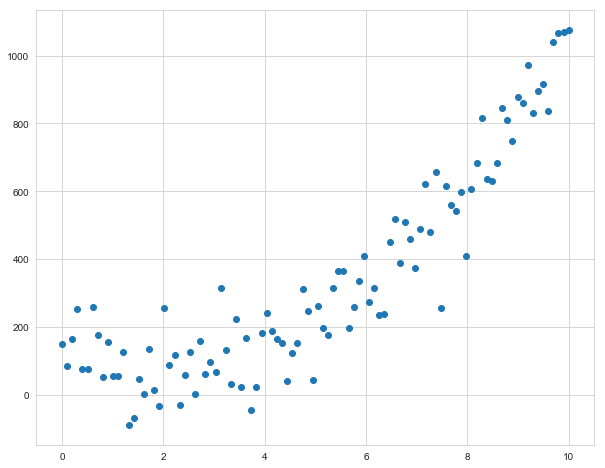

In [4]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y = X ** 3 + rng + 100

plt.figure(figsize=(10,8));
plt.scatter(X, y);

### Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

0.7643394574930141


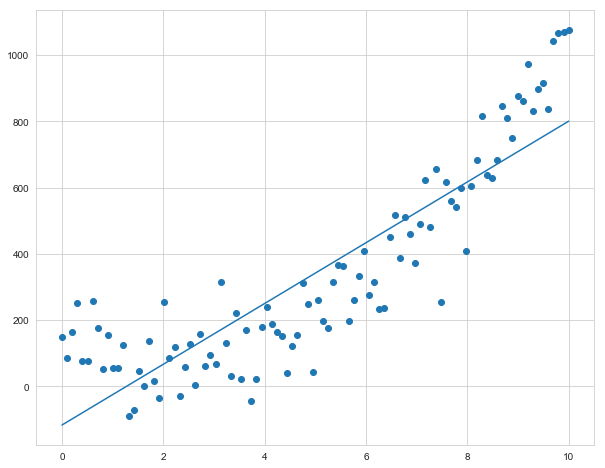

In [7]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
model_pred = lr.predict(X.reshape(-1, 1))

plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred);
print(r2_score(y, model_pred))

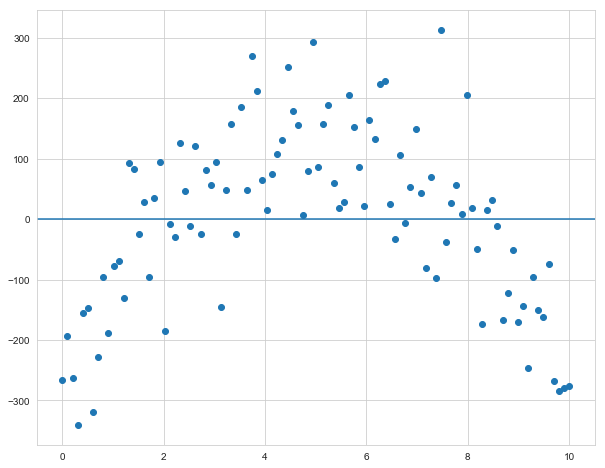

In [14]:
# R-squared not too too bad, but remember it is created data. Also look at the clear pattern of the residuals.
resid = model_pred - y

plt.figure(figsize=(10,8));
plt.scatter(X, resid);
plt.axhline(0, 0, 10)

### Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))

In [61]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1,1))
y_pred = lin_reg_2.predict(X_poly)

0.9173858308909386


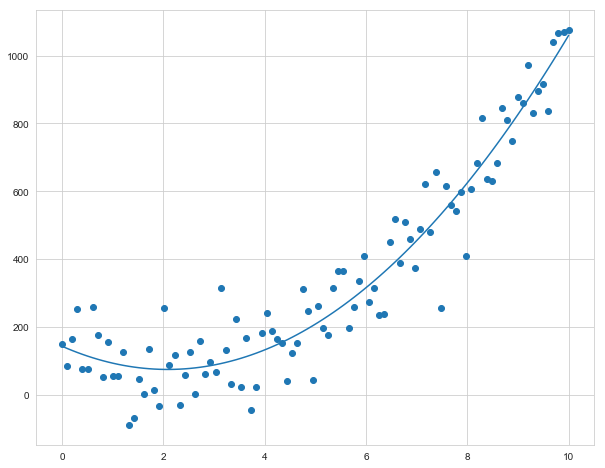

In [62]:
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
print(r2_score(y, y_pred))

***

## Boston Housing Dataset

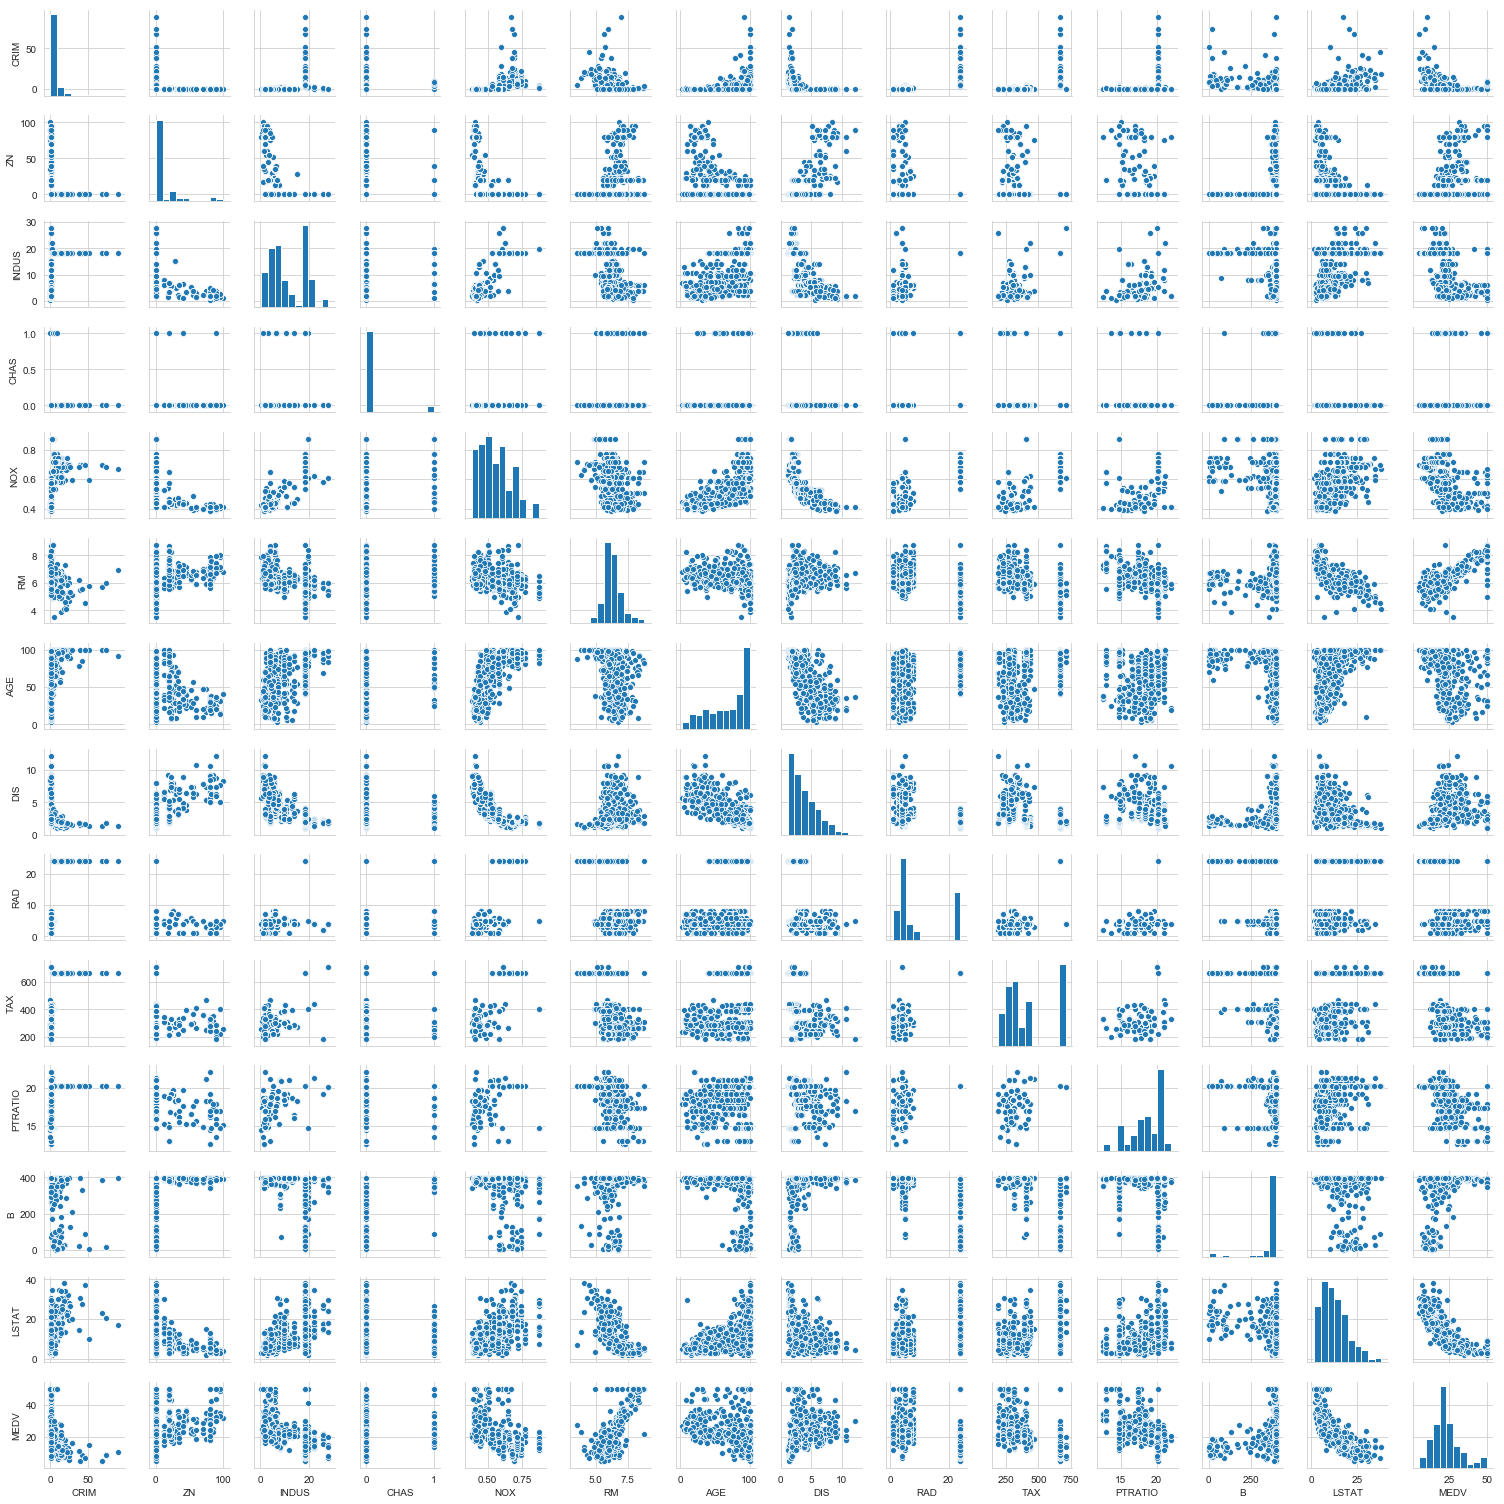

In [33]:
import os
#os.chdir('..')
path = os.getcwd() + '\data\Boston_Housing\housing.data'
df_boston = pd.read_csv(path, delim_whitespace=True, header=None)
df_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df_boston, height=1.5);

In [34]:
X_boston = df_boston['DIS'].values
y_boston = df_boston['NOX'].values

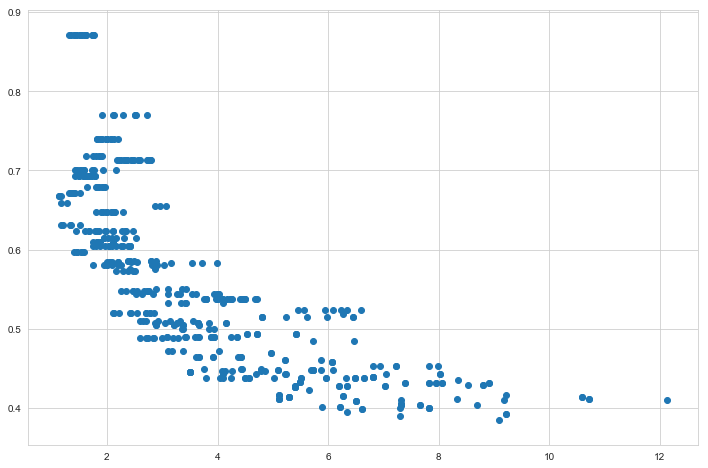

In [35]:
plt.figure(figsize=(12,8));
plt.scatter(X_boston, y_boston)

#### Linear

R2 score = 0.59


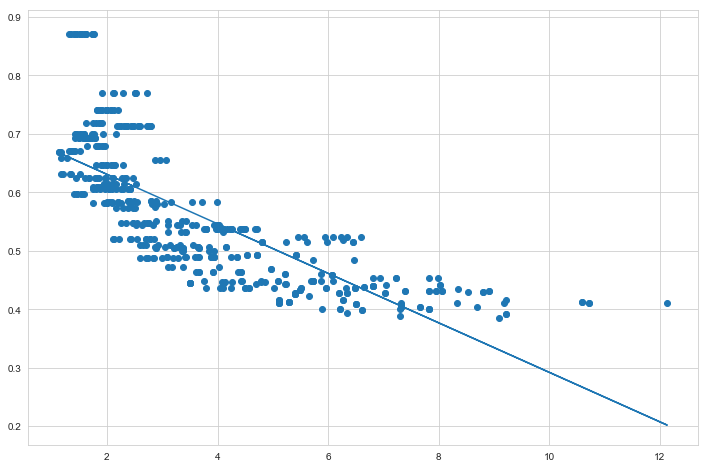

In [37]:
lr = LinearRegression()
lr.fit(X_boston.reshape(-1, 1), y_boston)
model_pred = lr.predict(X_boston.reshape(-1, 1))

plt.figure(figsize=(12, 8));
plt.scatter(X_boston, y_boston);
plt.plot(X_boston, model_pred);
print("R2 score = {:.2f}".format(r2_score(y_boston, model_pred)))

As we can see, linear is does a pretty awful job

### Quadratic

In [39]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_2 = LinearRegression()

In [40]:
lin_reg_2.fit(X_poly_b, y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
#Just make predictions on steps of one instead of every data point.
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [43]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1, 1)))

R2 score = 0.70


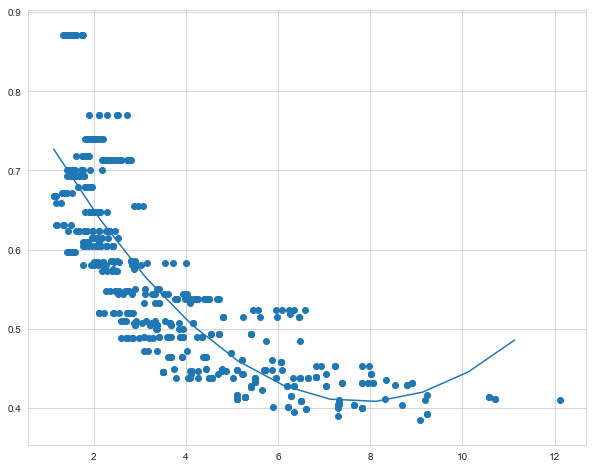

In [46]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R2 score = {:.2f}".format(r2_score(y_boston, lin_reg_2.predict(X_poly_b))))

Better, not great though.

### Cubic

In [49]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_3 = LinearRegression()

In [50]:
lin_reg_3.fit(X_poly_b, y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [55]:
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1, 1)))

R2 score = 0.71


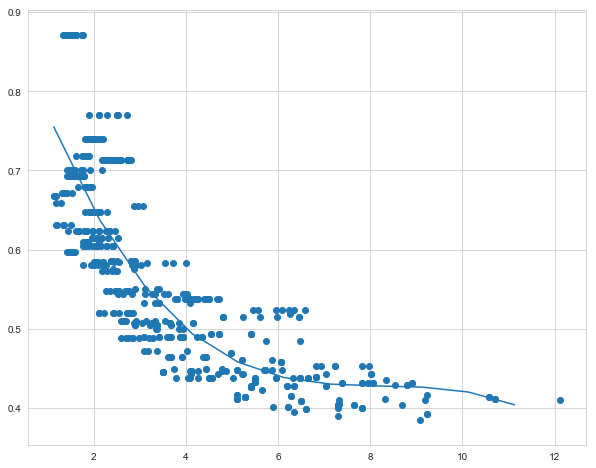

In [56]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred)
print("R2 score = {:.2f}".format(r2_score(y_boston, lin_reg_3.predict(X_poly_b))))

R-squared didn't improve that much. Probably starting to overfit a bit.